In [1]:
import time
import matplotlib.pyplot as plt

import LE as le
import LP as lp
import iterative as iterative
import graph_viz as viz
import logger_creator

from graph_gen import create_delegation_graph
import graph_tools
import networkx as nx

/opt/anaconda3/envs/thesis/lib/python3.12/site-packages/dash_bootstrap_components/_table.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Testing normal graph

In [7]:
# Normal test graph
import numpy as np

delegations_orig, nodes = create_delegation_graph(5, 0, seed=0)


In [ ]:
delegations = graph_tools.invert_graph(delegations_orig)

In [9]:
print("LE model")
print(le.resolve_delegations(delegations, nodes))

print("LP model")
powers, sinks = lp.resolve_delegations(delegations, nodes)
print(powers, sinks)


LE model
({'0': 1.0, '1': 1.2, '2': 1.8, '3': 0.0, '4': 1.0}, ['0', '1', '2', '4'])
LP model
{'0': 1.0, '1': 1.2, '2': 1.8, '3': 0.0, '4': 1.0, '__dummy': 0.0} ['0', '1', '2', '4']


In [10]:
le_model = le.set_up(delegations, nodes)
lp_model = lp.set_up(delegations, nodes)

In [11]:
viz.visualize_delegation_graph(delegations_orig, powers)

Parsing the data...Done


No trigger


In [12]:
%timeit le.solve(*le_model)
%timeit lp.solve(*lp_model)

3.43 μs ± 31.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.5 ms ± 384 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Results:

LE: 3.43 μs ± 31.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

LP: 17.5 ms ± 384 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)

# Big Graph

In [ ]:
delegations_org, nodes = create_delegation_graph(10000, 100, seed=0)
delegations = graph_tools.invert_graph(delegations_org)

powers_le, sinks_le = lp.resolve_delegations(delegations, nodes)

powers_lp, sinks_lp = lp.resolve_delegations(delegations, nodes)

print(f"Found same sinks: {sinks_le == sinks_lp}")
print(f"Found same powers: {powers_le == powers_lp}")


le_model = le.set_up(delegations, nodes)
lp_model = lp.set_up(delegations, nodes)

powers_iter = iterative.iterate_delegations(delegations, nodes)

for node in sinks_le:
    if (powers_le[node] - powers_iter[node] < 0.01):
        continue
    else: 
        print("Found non-matching powers for Node", node, ":",  powers_le[node], powers_lp[node], powers_iter[node])

print("Unless indicated otherwise, the rounded powers found in the iterative model are also the same")

Found same sinks: True
Found same powers: True
Node LE, LP, iterative
Unless indicated otherwise, the rounded powers found in the iterative model are also the same


In [23]:
%timeit le.solve(*le_model)
%timeit lp.solve(*lp_model)
%timeit iterative.iterate_delegations(delegations, nodes)

4.13 s ± 178 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
149 ms ± 768 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.43 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Results

10 000 nodes, 100 loops

LE: 4.13 s ± 178 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

**LP: 149 ms ± 768 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)**

Iter: 6.43 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# Fine delegations

In [ ]:
fine_delegation_weight = 10 ** -2

delegations_org = {
    '0': {'1': fine_delegation_weight,
          '2': 1 - fine_delegation_weight},
    '2': {'0': 1}
}
nodes = ['0', '1', '2']
delegations = graph_tools.invert_graph(delegations_org)

powers_le, sinks_le = lp.resolve_delegations(delegations, nodes)

powers_lp, sinks_lp = lp.resolve_delegations(delegations, nodes)

print(f"Found same sinks: {sinks_le == sinks_lp}")
print(f"Found same powers: {powers_le == powers_lp}")


le_model = le.set_up(delegations, nodes)
lp_model = lp.set_up(delegations, nodes)

powers_iter = iterative.iterate_delegations(delegations, nodes)

print("Powers from LE:", powers_le)
print("Powers after iteration:", powers_iter)

viz.visualize_delegation_graph(delegations_org, powers_iter)


Found same sinks: True
Found same powers: True
Powers from LE: {'0': 0.0, '1': 3.0, '2': 0.0, '__dummy': 0.0}
Powers after iteration: {'0': 0.000993147795920855, '1': 2.9980137044081467, '2': 0.0009931477959208637}
Parsing the data...Done
Parsing the data...Done


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


No trigger
No trigger
No trigger


In [12]:
%timeit le.solve(*le_model)
print("")
%timeit lp.solve(*lp_model)
print("")
%timeit iterative.iterate_delegations(delegations, nodes)

/Users/DavidHolzwarth/Uni/EPFL/bachelors-thesis/LE.py:45: SparseEfficiencyWarning:

spsolve requires A be CSC or CSR matrix format



53.7 μs ± 1.47 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

20.2 ms ± 276 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)

1.46 ms ± 14.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Results

LE

LP

Iterative

### fine_delegation_weight = 10 ** -2

**53.7 μs ± 1.47 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)**

20.2 ms ± 276 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)

1.46 ms ± 14.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Notice, here, the LP solver is the slowest


### fine_delegation_weight = 10 ** -6

**53.3 μs ± 1.24 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)**

22.5 ms ± 1.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

14 s ± 99.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Notice, that here, the iterative solver performs a lot worse, while the LP and LE solver's runtime barely changes.

### Note

This example is artificial, and not unrealistic, but an example of a similar power "trap" as the one describe above could be this:

```
<- 0.5 - A - 0.5 -> B - 0.9 ->  C - 0.9 ->  D

          <- 0.1 -   <- 0.1 -    <- 1 --

```


# Exploring Runtime Consistency

In [ ]:
LOOPS = 3#5
SEED = 100

range_x = range(10, 12, 1)

time_data_le = []
time_data_lp = []
time_data_iterative = []

logger, handler = logger_creator.create_logger("benchmarking")

for num_loops in range(1):
    times_le = []
    times_lp = []
    times_iterative = []

    for num_nodes in range_x:
        print(num_nodes)

        countdown = 5
        while countdown > 0:
            countdown -= 1

            delegations_orig, nodes = create_delegation_graph(num_nodes, LOOPS, seed=SEED)
            delegations= graph_tools.invert_graph(delegations_orig)
            try: 
                le_model = le.set_up(delegations, nodes)
                _ = le.resolve_delegations(delegations, nodes)
                break
            except:
                print(le_model)
                SEED += 1
                print("Graph infeasible, retrying")

        # Verify the solutions are equal
        powers_le, sinks_le = lp.resolve_delegations(delegations, nodes)
        powers_lp, sinks_lp = lp.resolve_delegations(delegations, nodes)
        powers_iter = iterative.iterate_delegations(delegations, nodes)

        # --------------------
        # 21 should be 0.001s
        # 16 should be 0.02s
        if num_nodes == 11 :
            graph_11 = delegations_orig, powers_lp
            
        if num_nodes == 12:
            graph_12 = delegations_orig, powers_lp
        # --------------------

        if powers_le != powers_lp:
            logger.error("Powers do not match")
            logger.error(f"LE: {powers_le}")
            logger.error(f"LP: {powers_lp}")
            print("Mismatching powers in LE and LP. Check the log file for details.")
            break

        for node in sinks_le:
            if (powers_lp[node] - powers_iter[node] < 0.01):
                continue
            else: 
                logger.error("Powers do not match")
                logger.error(f"LP: {powers_lp}")
                logger.error(f"Iterative: {powers_iter}")
                print("Mismatching powers in LP and Iterative. Check the log file for details.")
                break

        n = 10
        if 0 <= num_nodes < 500:
            n = 100
        elif 500 <= num_nodes < 1000:
            n = 50

        # LE
        start_time = time.time()
        le_model = le.set_up(delegations, nodes)
        for _ in range(n):
            le.solve(*le_model)
        end_time = time.time()
        
        times_le.append((end_time - start_time) / n)

        # LP
        start_time = time.time()
        lp_model = lp.set_up(delegations, nodes)
        for _ in range(n):
            lp.solve(*lp_model)
        end_time = time.time()

        times_lp.append((end_time - start_time) / n)

        

        # Iterative
        start_time = time.time()
        for _ in range(n):
            p = iterative.iterate_delegations(delegations, nodes)
        end_time = time.time()

        times_iterative.append((end_time - start_time) / n)

        # --------------------
        # 21 should be 0.001s
        # 16 should be 0.02s
        if num_nodes == 11 or num_nodes == 12:
            print(times_iterative[-1])
        # --------------------


    time_data_le.append(times_le)
    time_data_lp.append(times_lp)
    time_data_iterative.append(times_iterative)

logger.removeHandler(handler)
handler.close()

x = list(range_x)

plt.clf()

for i in range(len(time_data_lp)):
    plt.plot(x, time_data_le[i], label=f"LE")
    plt.plot(x, time_data_lp[i], label=f"LP") 
    plt.plot(x, time_data_iterative[i], label=f"Iterative")  

plt.legend()
plt.xlabel("Amount of Nodes")
plt.ylabel("Time (s)")
plt.title("Runtime of Delegation Algorithms")
plt.show()

10


PulpSolverError: Use COIN_CMD if you want to set a path

In [18]:
delegations_12, powers_12 = graph_12
delegations_11, powers_11 = graph_11

powers_12 = {f"{k}_g12": v for k, v in powers_12.items()}
delegations_12 = {
    f"{outer}_g12": {f"{inner}_g12": v for inner, v in inner_dict.items()}
    for outer, inner_dict in delegations_12.items()
}

powers_11 = {f"{k}_g11": v for k, v in powers_11.items()}
delegations_11 = {
    f"{outer}_g11": {f"{inner}_g11": v for inner, v in inner_dict.items()}
    for outer, inner_dict in delegations_11.items()
}

delegations_merged = delegations_11| delegations_12
powers_merged = powers_11 | powers_12

viz.visualize_delegation_graph(delegations_merged, powers_merged)

Parsing the data...Done
Parsing the data...Done


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


No trigger


5 loops

![Benchmark Plot](Figures/2025-05-05%20Benchmarks/0-2k%20nodes.png)

3 loops, seed = 100

![Benchmark Plot](Figures/2025-05-05%20Benchmarks/0-20%20nodes.png)

We see, that when the graph has 11 nodes, we get a spike in runtime (0.07s), while the graph with 12 nodes has a lower runtime (0.001s), lower than even the graph with 10 nodes. The logs confirm that this different is not just explainable by external factors:

(from `log/iterative_20250506_10`)

```log

2025-05-06 10:50:03,253 - INFO - Iterated 8064 times (11 nodes)

2025-05-06 10:53:16,228 - INFO - Iterated 149 times (12 nodes)

```

An exploration of this by inspecting the graph is in Goodnotes under Thesis/Benchmarking notes






# Sparse Graphs

![Benchmark Plot](Figures/2025-05-05%20Benchmarks/0-3.5k%20noddes.png)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


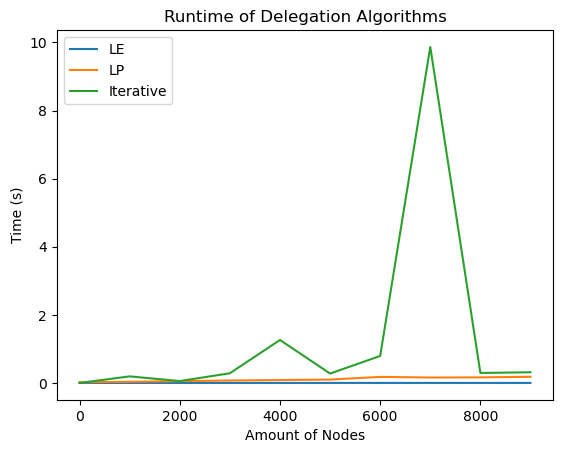

In [30]:
LOOPS = 5
SEED = 0

range_x = range(0, 10000, 1000)

time_data_le = []
time_data_lp = []
time_data_iterative = []

logger, handler = logger_creator.create_logger("benchmarking")

for num_loops in range(1):
    times_le = []
    times_lp = []
    times_iterative = []

    for num_nodes in range_x:
        print(num_nodes)

        countdown = 5
        while countdown > 0:
            countdown -= 1

            delegations_orig, nodes = create_delegation_graph(num_nodes, LOOPS, seed=SEED)
            delegations= graph_tools.invert_graph(delegations_orig)
            try: 
                lp_model = lp.set_up(delegations, nodes)
                _ = lp.resolve_delegations(delegations, nodes)
                break
            except:
                print(lp_model)
                SEED += 1
                print("Graph infeasible, retrying")

        # Verify the solutions are equal
        powers_le, sinks_le = lp.resolve_delegations(delegations, nodes)
        powers_lp, sinks_lp = lp.resolve_delegations(delegations, nodes)
        powers_iter = iterative.iterate_delegations(delegations, nodes)

        if powers_le != powers_lp:
            logger.error("Powers do not match")
            logger.error(f"LE: {powers_le}")
            logger.error(f"LP: {powers_lp}")
            print("Mismatching powers in LE and LP. Check the log file for details.")
            break

        for node in sinks_le:
            if (powers_lp[node] - powers_iter[node] < 0.01):
                continue
            else: 
                logger.error("Powers do not match")
                logger.error(f"LP: {powers_lp}")
                logger.error(f"Iterative: {powers_iter}")
                print("Mismatching powers in LP and Iterative. Check the log file for details.")
                break

        n = 1
        if 0 <= num_nodes < 500:
            n = 100
        elif 500 <= num_nodes < 1000:
            n = 50

        # LE
        le_model = le.set_up(delegations, nodes)
        start_time = time.time()
        # for _ in range(n):
        #     le.solve(*le_model)
        end_time = time.time()
        
        times_le.append((end_time - start_time) / n)

        # LP
        lp_model = lp.set_up(delegations, nodes)
        start_time = time.time()
        for _ in range(n):
            lp.solve(*lp_model)
        end_time = time.time()

        times_lp.append((end_time - start_time) / n)
    
        # Iterative
        start_time = time.time()
        for _ in range(n):
            p = iterative.iterate_delegations(delegations, nodes)
        end_time = time.time()

        times_iterative.append((end_time - start_time) / n)


    time_data_le.append(times_le)
    time_data_lp.append(times_lp)
    time_data_iterative.append(times_iterative)

logger.removeHandler(handler)
handler.close()

x = list(range_x)

plt.clf()

for i in range(len(time_data_lp)):
    plt.plot(x, time_data_le[i], label=f"LE")
    plt.plot(x, time_data_lp[i], label=f"LP") 
    plt.plot(x, time_data_iterative[i], label=f"Iterative")  

plt.legend()
plt.xlabel("Amount of Nodes")
plt.ylabel("Time (s)")
plt.title("Runtime of Delegation Algorithms")
plt.show()

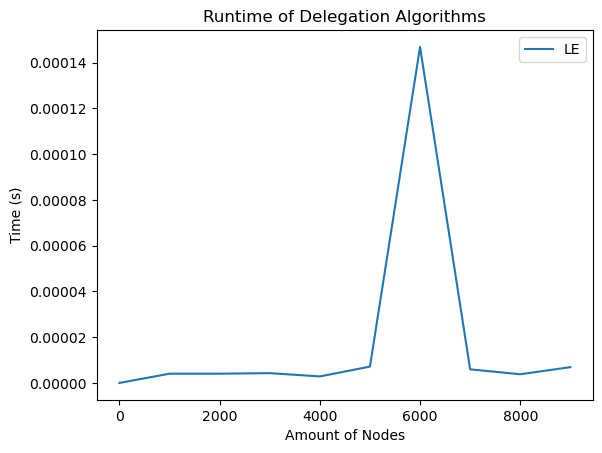

In [35]:
for i in range(len(time_data_lp)):
    plt.plot(x, time_data_le[i], label=f"LE")
    #plt.plot(x, time_data_lp[i], label=f"LP") 
    #plt.plot(x, time_data_iterative[i], label=f"Iterative")  

plt.legend()
plt.xlabel("Amount of Nodes")
plt.ylabel("Time (s)")
plt.title("Runtime of Delegation Algorithms")
plt.show()

# Dense vs Sparse

So far, most graphs we've looked at were sparse, since my graph generator's nodes have at most four delegations per node

0
200
400
600
800


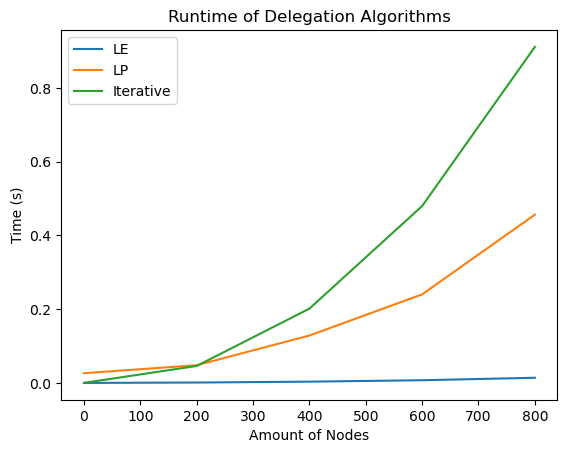

In [17]:
range_x = range(0, 1000, 200)

time_data_le = []
time_data_lp = []
time_data_iterative = []

logger, handler = logger_creator.create_logger("benchmarking")

for num_loops in range(1):
    times_le = []
    times_lp = []
    times_iterative = []

    for num_nodes in range_x:
        print(num_nodes)

        countdown = 5
        while countdown > 0:
            countdown -= 1

            complete_graph = nx.complete_graph(num_nodes)
            complete_graph = nx.relabel_nodes(complete_graph, {node: str(node) for node in complete_graph.nodes()})
            delegation_graph = graph_tools.prepare_graph(complete_graph.nodes(), complete_graph.edges())
            delegations_orig = graph_tools.nx_graph_to_dict(delegation_graph)
            delegations = graph_tools.invert_graph(delegations_orig)
            nodes = list(delegation_graph)

            try: 
                lp_model = lp.set_up(delegations, nodes)
                _ = lp.resolve_delegations(delegations, nodes)
                break
            except:
                print(lp_model)
                SEED += 1
                print("Graph infeasible, retrying")

        # Verify the solutions are equal
        powers_le, sinks_le = lp.resolve_delegations(delegations, nodes)
        powers_lp, sinks_lp = lp.resolve_delegations(delegations, nodes)
        powers_iter = iterative.iterate_delegations(delegations, nodes)

        if powers_le != powers_lp:
            logger.error("Powers do not match")
            logger.error(f"LE: {powers_le}")
            logger.error(f"LP: {powers_lp}")
            print("Mismatching powers in LE and LP. Check the log file for details.")
            break

        for node in sinks_le:
            if (powers_lp[node] - powers_iter[node] < 0.01):
                continue
            else: 
                logger.error("Powers do not match")
                logger.error(f"LP: {powers_lp}")
                logger.error(f"Iterative: {powers_iter}")
                print("Mismatching powers in LP and Iterative. Check the log file for details.")
                break

        n = 10
        if 0 <= num_nodes < 500:
            n = 100
        elif 500 <= num_nodes < 1000:
            n = 50

        # LE
        le_model = le.set_up(delegations, nodes)
        start_time = time.time()
        for _ in range(n):
            le.solve(*le_model)
        end_time = time.time()
        
        times_le.append((end_time - start_time) / n)

        # LP
        lp_model = lp.set_up(delegations, nodes)
        start_time = time.time()
        for _ in range(n):
            lp.solve(*lp_model)
        end_time = time.time()

        times_lp.append((end_time - start_time) / n)
    
        # Iterative
        start_time = time.time()
        for _ in range(n):
            p = iterative.iterate_delegations(delegations, nodes)
        end_time = time.time()

        times_iterative.append((end_time - start_time) / n)


    time_data_le.append(times_le)
    time_data_lp.append(times_lp)
    time_data_iterative.append(times_iterative)

logger.removeHandler(handler)
handler.close()

x = list(range_x)

plt.clf()

for i in range(len(time_data_lp)):
    plt.plot(x, time_data_le[i], label=f"LE")
    plt.plot(x, time_data_lp[i], label=f"LP") 
    plt.plot(x, time_data_iterative[i], label=f"Iterative")  

plt.legend()
plt.xlabel("Amount of Nodes")
plt.ylabel("Time (s)")
plt.title("Runtime of Delegation Algorithms")
plt.show()

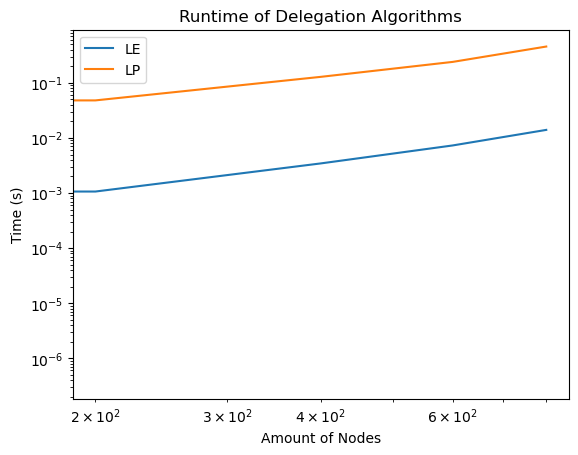

In [29]:
for i in range(len(time_data_lp)):
    plt.plot(x, time_data_le[i], label=f"LE")
    plt.plot(x, time_data_lp[i], label=f"LP") 
    #plt.plot(x, time_data_iterative[i], label=f"Iterative")  

plt.legend()
plt.xlabel("Amount of Nodes")
plt.ylabel("Time (s)")
plt.title("Runtime of Delegation Algorithms")
plt.loglog()
plt.show()